# Assignment 3: Reinforcement Learning

**Goal**: Get familiar with a reinforcement learning approach to solve multi-armed bandit problem.

We will implement a value-based reinforcement learning approach with two
algorithm variations: epsilon-greedy (e-greedy) and upper confidence bound
(UCB) algorithms and perform an analysis on their behavior.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

* Plagiarism is automatically checked and set to **0 points**

* It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

* Use of generative AI to answer **ANY** part of the assignment is
**strictly prohibited**, if any part of the assignment is found to be
answered using generative AI, the question will be awarded **0 points**.

## 1. Introduction: Multi-Armed Bandit Problem

Imagine you are in a casino facing a row of slot machines, say there are 20 of them. Each slot machine is providing reward based on a certain probability distribution that is unknown to you.

This is your first time in this casino, thus you have no idea what to do next. You have just enough money to play for 100 times and each of these times, you can pick any machine you want and after "pulling"

What would you do?

The overall goal would of course be to find out the one that is providing the most reward, right? What should your algorithm be to get the most reward at the end?

## 2. Implementation

In [ ]:
%pip install 'matplotlib>=3.7' 'numpy>=1.25' 'tqdm>=4.65' ipywidgets

In [ ]:
%pip install 'matplotlib>=3.7' 'numpy>=1.25' 'tqdm>=4.65' --upgrade

In [ ]:
%matplotlib inline

In [ ]:
# First import the dependencies
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange

**Question 1 (0-0.25-0.5pt):** Please write down mathematical expressions arm selection for the e-greedy and UCB algorithms and discuss their parameters.

**Answer:** <br> epsilon greedy: <br>

\begin{align*}
a_t =
\begin{cases}
\text{argmax}_a Q_t(a) & \text{if } \text{rand} < 1 - \epsilon \\
\text{rand}(a) & \text{otherwise}
\end{cases}
\end{align*}
\begin{align*} \\
a & = \text{action} \\
a_t & = \text{action selection at time step } t \\
argmax_a & = \text{selects the action that maximizes the function} \\
Q_t(a) & = \text{estimated value of action } a \text{ at time step } t \\
rand(a) & = \text{random action} \\
\epsilon & = \text{exploration rate}
\end{align*}




UCB algorithm: <br>
\begin{align*}
a_t = \text{argmax}_a \left( Q_t(a) + c \cdot \sqrt{\frac{\ln(t)}{N_t(a)}} \right)
\end{align*}
\begin{align*} \\
a & = \text{action} \\
a_t & = \text{action selection at time step } t \\
argmax_a & = \text{selects the action that maximizes the function} \\
Q_t(a) & = \text{estimated value of action } a \text{ at time step } t \\
rand(a) & = \text{random action} \\
c & = \text{a constant that determines the exploration rate} \\
ln(t) &= \text{The natural logarithm of t} \\
N_t(a) & = \text{The number of times an action is selected}
\end{align*}
---

**Task 1 (3 pt):** Please implement the e-greedy and UCB algorithms in the code given below.

In [ ]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.75 pts if the code works but some functions are incorrect and it is badly explained
# 1.5 pts if the code works but some functions are incorrect but it is explained well
# 2.25 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 3 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


# ============ PLEASE DO NOT CHANGE ============ #


def initialize(n_arms):
    rng = np.random.default_rng()
    R = rng.uniform(low=0.45, high=0.55, size=n_arms)
    R[rng.integers(n_arms)] = 0.9
    # return actual mean of the reward probabilities
    return R


# ================================================ #


# the epsilon-greedy algorithm (ignore kwargs)
def e_greedy(Q, epsilon, **kwargs):
    # Generate a random probability
    prob = np.random.uniform(0,1)
    if prob < (1 - epsilon):
      # If the probability falls within 1 - epsilon, select the index from Q
      # corresponding to the max value.
      selection = np.argmax(Q)
    else:
      # Create an array of indices that does not include the index of the max
      # value of Q. This ensures that the max value is not chosen by accident.
      non_max_index = [i for i in range(len(Q)) if i != np.argmax(Q)]
      # Randomly select one of the indices.
      selection = np.random.choice(non_max_index)

    #########################################
    return selection


# The upper confidence bound algorithm (ignore kwargs)
def UCB(Q, selection_counter, t, **kwargs):
    C = 0.5  # Parameter (keep it constant)
    # Calvulates the upper confidence bound for each value in Q. A small number is added
    # to the selection counter to avoid division by zero.
    ucb_vals = Q + (C * np.sqrt((np.log(t) / (selection_counter + 0.0000001))))
    # Selects the the index corresponding with the highest ucb value.
    selection = np.argmax(ucb_vals)
    #########################################
    return selection


def MAB(
    trials,  # total number of arm pulls
    n_arms,  # number of arms to pull
    epsilon,  # exploration parameter for the epsilon-greedy algorithm
    alpha,  # learning rate for updating Q-values
    init,  # initial starting value of the Q-values
    algorithm,  # the type of update: e_greedy or UCB
):
    # ============ PLEASE DO NOT CHANGE ============ #
    # initialization of the reward distributions unknown to the player
    R = initialize(n_arms)
    cumulative_reward_trend = np.zeros(trials)
    selection_trend = np.zeros(trials)
    reward_trend = np.zeros(trials)
    cumulative_reward = 0

    # initialize counter of selection for each arms
    selection_counter = np.zeros(n_arms)

    # initialize initial estimates of rewards
    Q = np.ones(n_arms) * init
    # ================================================ #

    for i in trange(trials, leave=False):
        # ============ PLEASE DO NOT CHANGE ============ #
        # select an arm to pull based on reward estimates and other
        kwargs = {
            "Q": Q,
            "epsilon": epsilon,
            "selection_counter": selection_counter,
            "t": i,
        }
        selection = algorithm(**kwargs)
        reward = np.random.normal(R[selection], 0.01)
        # ================================================ #
        # Update Q values
        Q[selection] += alpha * (reward - Q[selection])


        # ============ PLEASE DO NOT CHANGE ============ #
        reward_trend[i] = reward
        selection_trend[i] = selection
        selection_counter[selection] += 1
        cumulative_reward += reward
        cumulative_reward_trend[i] = cumulative_reward
        # ================================================ #

    return reward_trend

In [1]:
# ######################CODE FOR TESTING########################
# # arms = initialize(10)
# # prob = np.random.uniform(0,1)
# # if prob < (1- epsilon):
# #   selection = arms.max()
# # else:
# #   selection =

# # arms.max()
# # print(prob)

# ###########UPDATING Q########################
# Q = np.ones(10) * 0.1
# Q[1] = 0.5
# Q[4] = 0.75
# max_val = Q.max()

# selection_index = 0
# for index, val in enumerate(Q):
#   if val == max_val:
#     print(val)
#     print(index)
#     selection_index = index
#     print(selection_index)
#     break

# Q[selection_index]

# # np.argmax(Q)
# # np.random.randint(len(Q))

# non_max_index = [i for i in range(len(Q)) if i != np.argmax(Q)]
# non_max_index
# # selection = np.random.choice(non_max_index)


# #############UCB#######################
# # np.argmax()
# selection_counter = np.zeros(len(Q))
# selection_counter[4]+= 2
# selection_counter


# C = 0.5
# t = 2


# ucb_vals = Q + (C * np.sqrt((np.log(t) / (selection_counter + 0.00001))))
# print(ucb_vals)
# print(np.argmax(ucb_vals))
# Q






**Question 2 (0-0.25-0.5pt):** Please explain the concept of exploration and exploitation in the context epsilon-greedy and UCB algorithm contexts.
How does the epsilon-greedy algorithm balance exploration and exploitation?



**Answer:** The espilon-greedy program makes it possible to randomly choose arms with a probability epsilon other than the current arm with the highest average award. Therefore, a higher value for epsilon encourages more exploration, while a lower value for epsilon encourages more exploitation of the current highest average reward.

The UCB algorithm relies on the uncertainty term for exploration. A higher Value for C increases the weight for the uncertainty terms, which in turn raises the chance an arm that has been explored less will be chosen. As an arm gets pulled more frequently over time the uncertainty term will diminish. The addition of the uncertainty term encourages exploration in the beginning of the algorithm. After the uncertainty term has diminished for most arms, the algorithm can efficiently exploit the arm with the highest average reward.

---

## 3. Algorithm Analysis

In [ ]:
# ============ PLEASE DO NOT REMOVE ============ #
def plot_experiments(experiment1, experiment2, labels):
    experiment1 = np.array(experiment1)
    experiment1_std = np.std(experiment1, axis=0)
    experiment1_mean = np.mean(experiment1, axis=0)

    experiment2 = np.array(experiment2)
    experiment2_std = np.std(experiment2, axis=0)
    experiment2_mean = np.mean(experiment2, axis=0)

    mean = [experiment1_mean, experiment2_mean]
    std = [experiment1_std, experiment2_std]

    plt.figure(figsize=(12, 6))
    y_values = np.arange(0, len(mean[0]))
    for i in range(len(mean)):
        plt.plot(y_values, mean[i], label=labels[i])
        plt.fill_between(y_values, mean[i] + std[i], mean[i] - std[i], alpha=0.2)

    plt.xlabel("Arm pulls (trials)")
    plt.ylabel("Average reward of 20 runs")

    plt.legend()


# ================================================ #

## 2. Comparison of e-greedy and UCB algorithms

Running the code below will launch all the experiments that we would like to plot and perform analysis on.

In [ ]:
experiment1 = []  # epsilon greedy epsilon: 0.1 initial Q: 0
experiment2 = []  # epsilon greedy epsilon: 0.1 initial Q: 1
experiment3 = []  # epsilon greedy epsilon: 0.2 initial Q: 0

experiment4 = []  # UCB initial Q: 0
experiment5 = []  # UCB initial Q: 1

for _ in trange(20):
    # MAB(trials, n_arms, epsilon, alpha, init, algorithm)
    experiment1.append(MAB(5_000, 20, 0.1, 0.1, 0, e_greedy))
    experiment2.append(MAB(5_000, 20, 0.1, 0.1, 1, e_greedy))
    experiment3.append(MAB(5_000, 20, 0.2, 0.1, 0, e_greedy))

    experiment4.append(MAB(5_000, 20, 0.1, 0.1, 0, UCB))
    experiment5.append(MAB(5_000, 20, 0.1, 0.1, 1, UCB))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

<ipython-input-66-ca9ff1612c56>:49: RuntimeWarning: divide by zero encountered in log
  ucb_vals = Q + (C * np.sqrt((np.log(t) / (selection_counter + 0.0000001))))
<ipython-input-66-ca9ff1612c56>:49: RuntimeWarning: invalid value encountered in sqrt
  ucb_vals = Q + (C * np.sqrt((np.log(t) / (selection_counter + 0.0000001))))


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

---
**Question 3 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 0 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** UCB intercepts epsilon greedy quite early in the initial exploration phase. In the exploitation phase it stabilizes at an average reward almost double the amount of that of epsilon greedy. There also seems to be less variance in the average reward that UCB reaps, due to the fact that it is able to exploit the most profifatble arm efficiently. Epsilon greedy plateaus early and continues to exploit a less optimal arm. It does exploit other options more frequently than UCB based on the variance shown in the plot. Overall, the UCB algorithm worked better both in terms of exploration and exploitation.

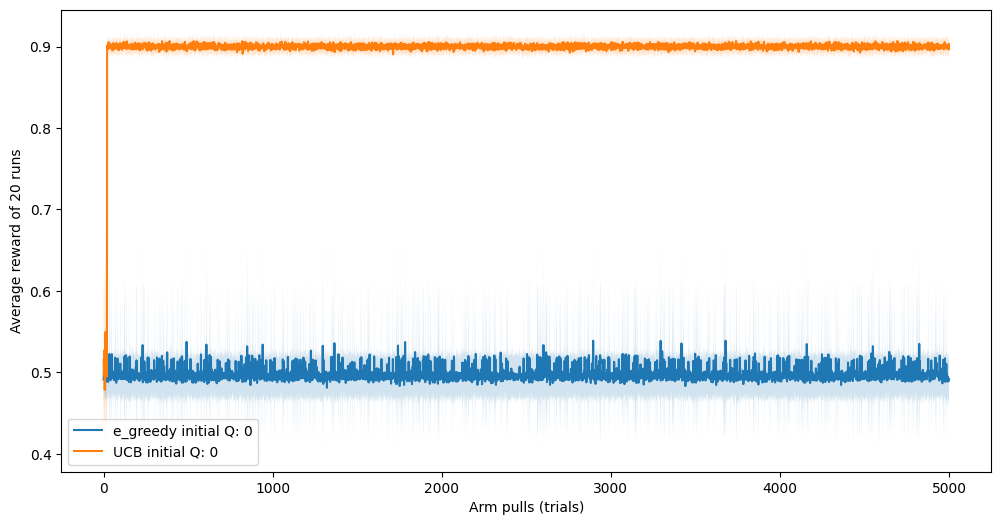

In [ ]:
label = ["e_greedy initial Q: 0", "UCB initial Q: 0"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment4,
    ########################################
    label,
)

---
**Question 4 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** The UCB algorithm wth initial 1 Performed very similar to  the UCB algorithm with initial 0. The epsilon greedy with initial 1 does seem to have a greater variance per run, and the average has increased slightly compared to epsilon greedy with initial 0. This is likely due to the fact that a higher inital Q-value increases bias towards arm. This can lead to less exploration and more variance per run. Likewise to the previous scenario, epsilon greedy gets outperformed by the UCB algorithm both in terms of exploration and exploitation.

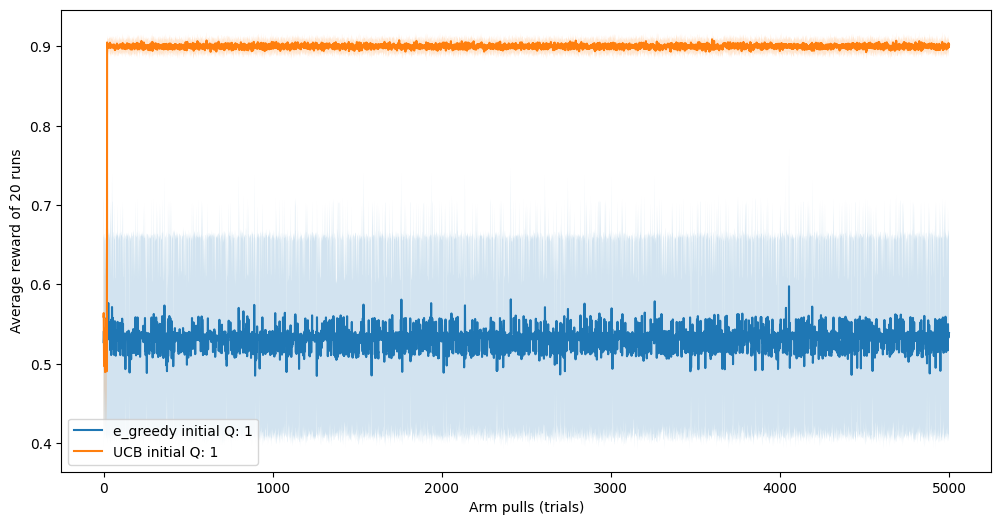

In [ ]:
label = ["e_greedy initial Q: 1", "UCB initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment2,
    experiment5,
    ########################################
    label,
)

---
**Question 5 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for initial Q: 0 for epsilon values 0.1 and 0.2 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** 0.1 explores much less than 0.2. This is due to the fact that there is a smaller probability 0.1 will pick an arm with a lower average reward. This causes it to exploit a less optimal arm more frequently. 0.2 explores more and  manages to exploit arms with higher average rewards more often. It does display more variance in its performance though. On average epsilon greedy with epsilon 0.2 did perform better.

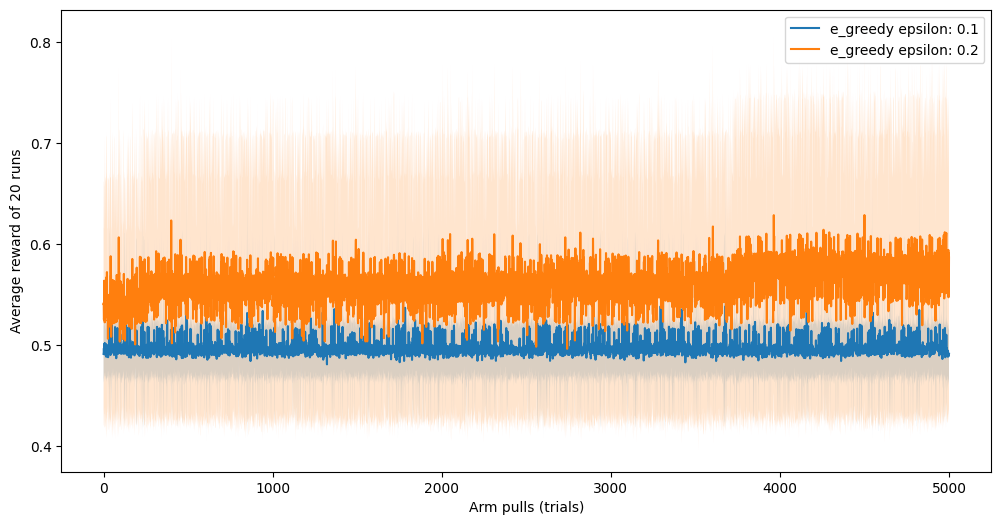

In [ ]:
label = ["e_greedy epsilon: 0.1", "e_greedy epsilon: 0.2"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment3,
    ########################################
    label,
)

---
**Question 6 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for epsilon = 0.1 initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** initial 1 shows more variance per run, as it is likely to be more biased towards one arm, which will decrease exploration and increases the rate of exploitation early on. Initial 0 initially explores more before converging. On average initial 1 still performs better, but its performance relies more on which arm its starts exploring first.

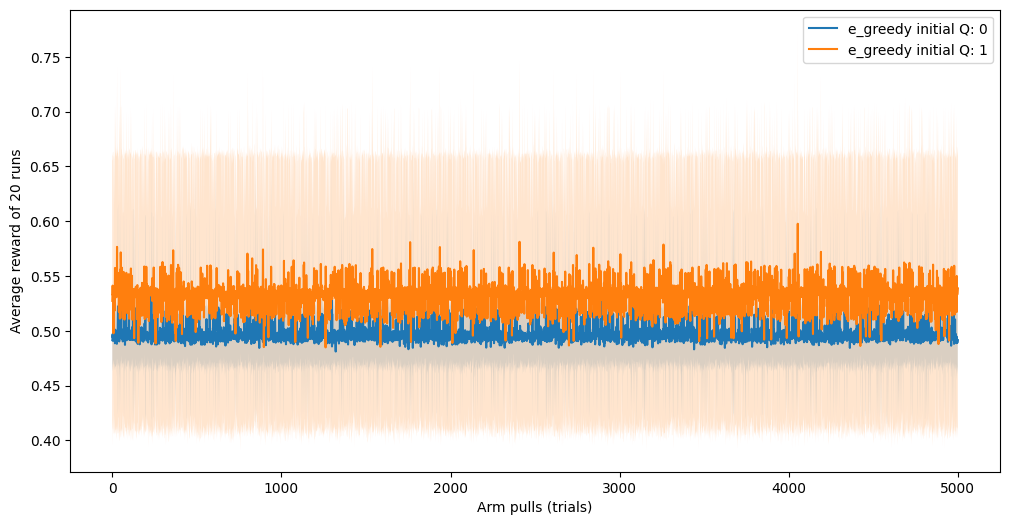

In [ ]:
label = ["e_greedy initial Q: 0", "e_greedy initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment2,
    ########################################
    label,
)

---
**Question 7 (0-0.5-1pt):** Plot and compare the average rewards for UCB initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** UCB 0 and 1 perform almost identical which suggests that the initial value has less impact on the performance of the algorithm. With both values UCB manages to effciently explore and exploit the arms.

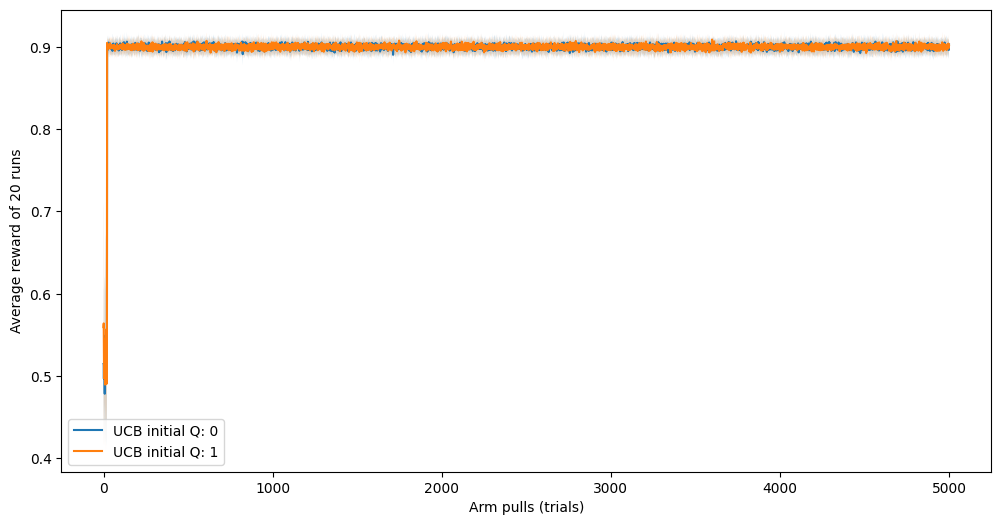

In [ ]:
label = ["UCB initial Q: 0", "UCB initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment4,
    experiment5,
    ########################################
    label,
)

---

## 3. Final remarks

**Question 8 (0-0.5-1pt):** Based on the all plots and analysis, please plot the best and worst performing algorithms and discuss the comparison? Discuss why that may be the case.

**Answer:** Unlike e-greedy, UCB adjusts its exploration based on the uncertainty. This allows it to explore and exploit more efficiently. The worst performing epsilon-greedy with an initial 0 may be attributed to its tendency to get stuck in suboptimal actions. This is likely due to a lack of exploration in the early stage of the experiment.

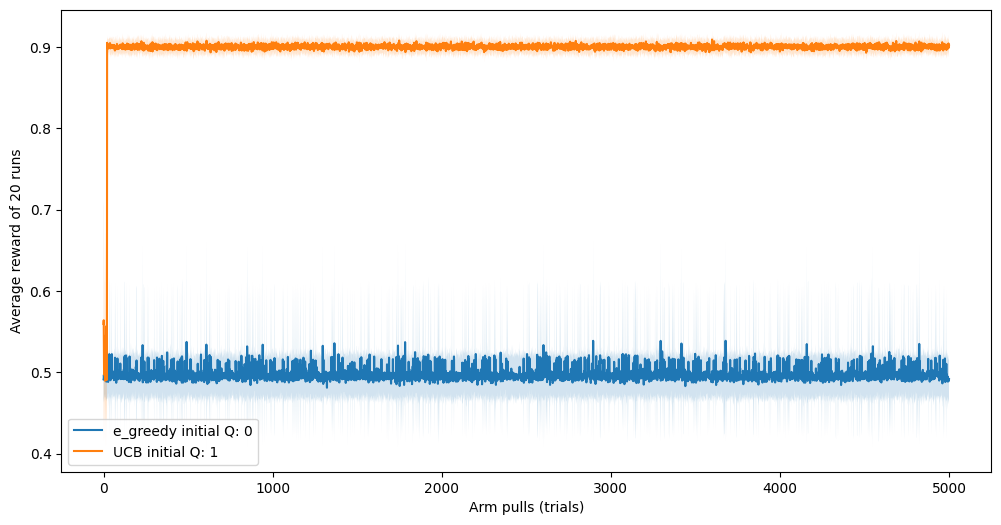

In [ ]:
# PLOT THE BEST AND WORST PERFORMING ALGORITHMS AND COMPARE
label = [
    ########### PLEASE FILL IN ##############
    "e_greedy initial Q: 0",
    "UCB initial Q: 1",
    ########################################
]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment5,
    ########################################
    label,
)